In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
import yfinance as yf
from datetime import datetime
%matplotlib inline

In [2]:
yf.pdr_override()

start_date = '18-04-2008'
end_date = '11-07-2021'

start = datetime.strptime(start_date, '%d-%m-%Y')
end = datetime.strptime(end_date, '%d-%m-%Y')

ticker = 'INTU'

data = yf.download(ticker, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source=data, start='2008-04-2')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

,INTU
Date,
2008-04-02,25.765926
2008-04-03,25.775005
2008-04-04,25.629896
2008-04-07,25.484783
2008-04-08,25.303394


In [5]:
log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

In [6]:
drift.values
stdev.values

array([0.0180425])

In [7]:
t_intervals = 100
iterations = 35

In [8]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [9]:
S0 = data.iloc[-1]
S0

INTU    501.51001
Name: 2021-07-16 00:00:00, dtype: float64

In [10]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [12]:
price_list[0] = S0
price_list

array([[501.51000977, 501.51000977, 501.51000977, ..., 501.51000977,
        501.51000977, 501.51000977],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [13]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [14]:
price_list

array([[501.51000977, 501.51000977, 501.51000977, ..., 501.51000977,
        501.51000977, 501.51000977],
       [493.76047106, 504.07590288, 500.32929177, ..., 501.6671029 ,
        506.15632174, 486.69193361],
       [499.74836399, 514.41585751, 499.86377443, ..., 497.50033348,
        494.63273406, 479.25323177],
       ...,
       [583.73144506, 442.56932606, 617.19299652, ..., 766.63440082,
        483.49993711, 376.23203031],
       [589.45568633, 441.03030412, 618.95753219, ..., 747.33689088,
        485.71047507, 398.12099607],
       [589.59379884, 437.8920276 , 609.04705322, ..., 744.49713572,
        495.28320026, 400.25759418]])

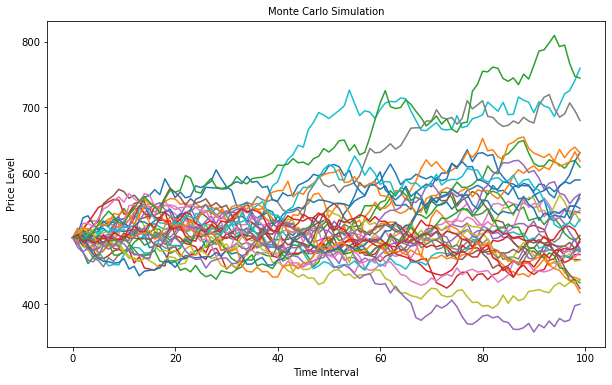

In [15]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

plt.xlabel('Time Interval',fontsize=10)
plt.ylabel('Price Level',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Price Level',fontsize=10)
plt.title('Monte Carlo Simulation',fontsize=10)
plt.show()